In [3]:
import pandas as pd
import seaborn as sns 
import numpy as np
import networkx as nx
import os

# Import Data

In [4]:
gaming = nx.read_gexf('../data/23march_chur/graphs/gaming_network.gexf')

In [5]:
os.listdir('../data/17april/graphs/')

['antiwork.gexf']

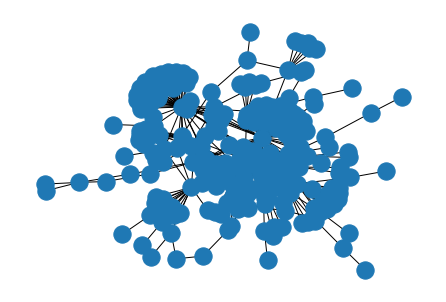

In [16]:
G = nx.read_gexf('../data/17april/graphs/antiwork.gexf')
graph = nx.to_undirected(G)
S = [graph.subgraph(c).copy() for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
nx.draw(S[0])

In [17]:
def inspect_network(folder):
    print(folder)
    creation_date = str(input())
    df = pd.DataFrame(columns = ['name', 'scrape_date', '#nodes', '#edges', 'average_shortest_path_length'])
    for file in os.listdir(folder):
        graph = nx.read_gexf(folder+file)
        graph = nx.to_undirected(graph)
        S = [graph.subgraph(c).copy() for c in sorted(nx.connected_components(graph), key=len, reverse=True)]
        graph = S[0]
        name = file[:-5]

        attr_dict = {
            'name' : name,
            'scrape_date' : creation_date, 
            '#nodes' : len(graph.nodes()),
            '#edges' : len(graph.edges()),
            'average_shortest_path_length' : nx.average_shortest_path_length(graph),
            #'Generalized_euclidean' : ge(graph),
            #'Our_polarity_score' : something(graph) 
        }
        df = df.append(attr_dict, ignore_index = True)
    return df

In [19]:
mar_23_df = inspect_network('../data/23march_chur/graphs/')
new_df = inspect_network('../data/17april/graphs/').append(mar_23_df)

/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_49104/4093932064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_49104/4093932064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_49104/4093932064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(attr_dict, ignore_index = True)
/var/folders/7n/1v9m4ykn66ddbcxt5nwgg9280000gn/T/ipykernel_49104/4093932064.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

In [20]:
new_df

,name,scrape_date,#nodes,#edges,average_shortest_path_length
0,antiwork,1681805302.998338,248,333,3.553742
0,gaming_network,1679900588.328796,572,939,2.74061
1,politics_nan,1681805298.753855,326,874,3.287192
2,politics,1680081857.336907,406,1291,2.306976
3,politics_network,1679901034.051718,419,1328,2.353405
4,gaming,1680081857.33528,459,659,2.35746


In [9]:
inspect_network(gaming)

TypeError: listdir: path should be string, bytes, os.PathLike, integer or None, not DiGraph

# Calculate stats per Network

# Check Correlations

# lineplots?